In [17]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.model_selection import train_test_split


boston = pd.read_csv(r"consolidated_coin_data.csv")
X= boston.iloc[:, 2:8]
y= boston['Volume']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

model = LinearRegression()
model.fit(X, y)

new_area = np.array(X_test)
predicted_price = model.predict(new_area)
pred_df= pd.DataFrame(predicted_price)
print("Predicted Prices(Linear Regression Model): ", pred_df)

ValueError: could not convert string to float: '7,320.13'

In [17]:
df = pd.read_csv(r"consolidated_coin_data.csv")
df['Currency'].unique()

array(['tezos', 'binance-coin', 'eos', 'bitcoin', 'tether', 'xrp',
       'bitcoin-cash', 'stellar', 'litecoin', 'ethereum', 'cardano',
       'bitcoin-sv'], dtype=object)

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load cryptocurrency price data
data = pd.read_csv('consolidated_coin_data.csv')

# Preprocess data
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.dropna(inplace=True)

# Create additional features (e.g., moving averages)
#data['SMA_50'] = data['Close'].rolling(window=50).mean()
#data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Prepare features and target variable
X = data[['Open', 'High', 'Low', 'Volume', 'Market Cap']]
y = data['Close']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Plot predictions
plt.figure(figsize=(16, 8))
plt.plot(data.index[-len(predictions):], predictions, label='Predicted Price', color='red')
plt.plot(data.index[-len(predictions):], y_test, label='Actual Price', color='blue')
plt.title('Cryptocurrency Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


ValueError: could not convert string to float: '7,320.13'

Mean Squared Error: 14.467268710457688


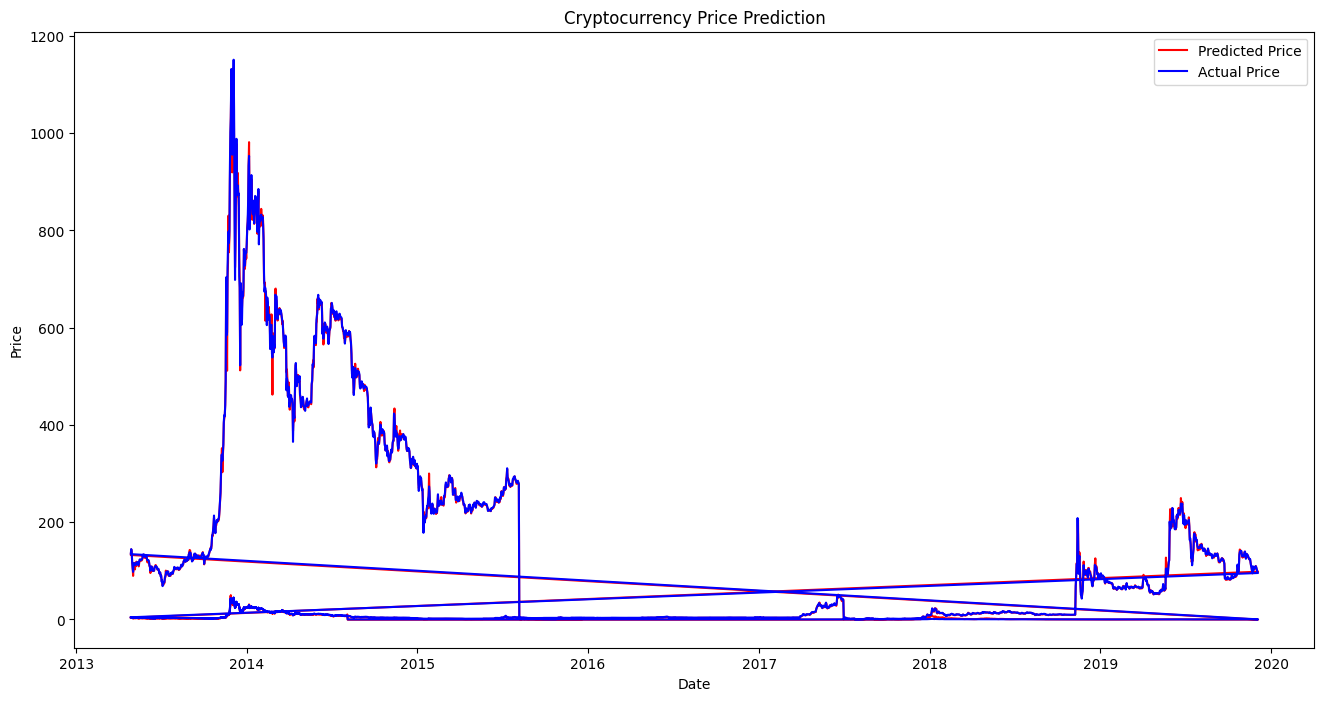

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load cryptocurrency price data
data = pd.read_csv('consolidated_coin_data.csv')

# Preprocess data
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.dropna(inplace=True)

# Remove commas from numeric columns
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']
data[numeric_cols] = data[numeric_cols].replace({',': ''}, regex=True)

# Convert columns to float
data[numeric_cols] = data[numeric_cols].astype(float)

# Replace 'SMA_50' and 'SMA_200' with appropriate columns
X = data[['Open', 'High', 'Low', 'Volume', 'Market Cap']]
y = data['Close']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Plot predictions
plt.figure(figsize=(16, 8))
plt.plot(data.index[-len(predictions):], predictions, label='Predicted Price', color='red')
plt.plot(data.index[-len(predictions):], y_test, label='Actual Price', color='blue')
plt.title('Cryptocurrency Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [10]:
import pandas as pd

# Load cryptocurrency price data
data = pd.read_csv('consolidated_coin_data.csv')

# Preprocess data
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.dropna(inplace=True)

# Remove commas from 'Close' column and convert to numeric
data['Close'] = data['Close'].str.replace(',', '').astype(float)

# Calculate profit for each cryptocurrency
data['Profit'] = data.groupby('Currency')['Close'].transform(lambda x: x.iloc[-1] - x.iloc[0])

# Find cryptocurrency with maximum and minimum profit
max_profit_coin = data.loc[data['Profit'].idxmax()]['Currency']
min_profit_coin = data.loc[data['Profit'].idxmin()]['Currency']
max_profit = data['Profit'].max()
min_profit = data['Profit'].min()

print(f"Currency with Maximum Profit: {max_profit_coin} (Profit: {max_profit})")
print(f"Currency with Minimum Profit: {min_profit_coin} (Profit: {min_profit})")


Currency with Maximum Profit: Date
2019-12-04           tezos
2019-12-04    binance-coin
2019-12-04             eos
2019-12-04         bitcoin
2019-12-04          tether
2019-12-04             xrp
2019-12-04    bitcoin-cash
2019-12-04         stellar
2019-12-04        litecoin
2019-12-04        ethereum
2019-12-04         cardano
2019-12-04      bitcoin-sv
Name: Currency, dtype: object (Profit: 133.993652)
Currency with Minimum Profit: Date
2019-12-04           tezos
2019-12-04    binance-coin
2019-12-04             eos
2019-12-04         bitcoin
2019-12-04          tether
2019-12-04             xrp
2019-12-04    bitcoin-cash
2019-12-04         stellar
2019-12-04        litecoin
2019-12-04        ethereum
2019-12-04         cardano
2019-12-04      bitcoin-sv
Name: Currency, dtype: object (Profit: -7117.82)


In [12]:
import pandas as pd

# Load cryptocurrency price data
data = pd.read_csv('consolidated_coin_data.csv')

# Preprocess data
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.dropna(inplace=True)

# Remove commas from 'Close' column and convert to numeric
data['Close'] = data['Close'].str.replace(',', '').astype(float)

# Calculate percentage change for each cryptocurrency
data['Percentage Change'] = (data.groupby('Currency')['Close'].transform('last') - data.groupby('Currency')['Close'].transform('first')) /  data.groupby('Currency')['Close'].transform('first') * 100

# Find cryptocurrency with highest percentage change
best_coin = data.loc[data['Percentage Change'].idxmax()]['Currency']
percentage_change = data['Percentage Change'].max()

print(f"Recommended Coin to Purchase: {best_coin} (Percentage Change: {percentage_change:.2f}%)")


Recommended Coin to Purchase: Date
2019-12-04           tezos
2019-12-04    binance-coin
2019-12-04             eos
2019-12-04         bitcoin
2019-12-04          tether
2019-12-04             xrp
2019-12-04    bitcoin-cash
2019-12-04         stellar
2019-12-04        litecoin
2019-12-04        ethereum
2019-12-04         cardano
2019-12-04      bitcoin-sv
Name: Currency, dtype: object (Percentage Change: 61934.32%)


In [18]:
import pandas as pd

# Load cryptocurrency price data
data = pd.read_csv('consolidated_coin_data.csv')

# Preprocess data
#data['Date'] = pd.to_datetime(data['Date'])
#data.set_index('Date', inplace=True)
#data.dropna(inplace=True)

# Remove commas from 'Close' column and convert to numeric
data['Close'] = data['Close'].str.replace(',', '').astype(float)

# Calculate percentage change for each cryptocurrency
data['Percentage Change'] = (data.groupby('Currency')['Close'].transform('last') - data.groupby('Currency')['Close'].transform('first')) / data.groupby('Currency')['Close'].transform('first') * 100

# Find cryptocurrency with highest percentage change
best_coin = data.groupby('Currency')['Percentage Change'].max().idxmax()
percentage_change = data.groupby('Currency')['Percentage Change'].max().max()

print(f"Recommended Coin to Purchase: {best_coin} (Percentage Change: {percentage_change:.2f}%)")


Recommended Coin to Purchase: xrp (Percentage Change: 61934.32%)


In [3]:
import pandas as pd

# Load cryptocurrency price data
data = pd.read_csv('consolidated_coin_data.csv')

# Preprocess data
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.dropna(inplace=True)

# Remove commas from 'Close' column and convert to numeric
data['Close'] = data['Close'].str.replace(',', '').astype(float)

# Calculate profit for each cryptocurrency
data['Profit'] = data.groupby('Currency')['Close'].transform(lambda x: x.iloc[-1] - x.iloc[0])

# Find cryptocurrency with minimum profit
worst_coin = data.groupby('Currency')['Profit'].min().idxmin()
min_profit = data.groupby('Currency')['Profit'].min().min()

print(f"Recommended Coin to Avoid: {worst_coin} (Profit: {min_profit})")


Recommended Coin to Avoid: bitcoin (Profit: -7117.82)
